Distribution Statement

  
  Unclassified - pending approval
  
  Originators:  
    
    Dr. Kevin Cox kevin.c.cox29.civ@army.mil
    Dr. Christopher O'brien christopher.m.obrien22.civ@us.navy.mil
    Dr. David H Meyer david.h.meyer3.civ@army.mil
    Mr. Benjamin Miller  benjamin.n.miller@navy.mil
    
    
    
    UMD Quantum Technology Center
    DEVCOM Army Research Laboratory
    Naval Air Warfare Center - Weapons Division
    DARPA
    
    University of Maryland
    3110 Jeong H. Kim Engineering Building
    8228 Paint Branch Dr. 
    College Park, MD 20742
    Phone: (301) 405-8335
    
    2800 Powder Mill Rd
    Adelphi, MD 20783

# Drawing a level diagram


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import rydiqule as rq
from arc import *   

### Initialize Cell, add states and couplings

In [5]:
# States
RydbergState_1 = [50, 2, 2.5, 0.5]  #states labeled n, l, j, m_j
RydbergState_2 = [51, 3, 3.5, 0.5] 
RydbergState_3 = [52, 4, 3.5, 0.5]

atom = "Rb85"
RbSensor_ss = rq.Cell(atom, *rq.D2_states(atom), RydbergState_1, RydbergState_2, RydbergState_3)

# Couplings specified by rabi_frequency
test_laser_1 = {'states': (0,2), 'rabi_frequency': 1, 'detuning': 2}
test_laser_2 = {'states': (1,3), 'rabi_frequency': 0, 'detuning': 3} #Not suppose to show up since Rabi_Frequency = 0

# Couplings specified by dipole moment
test_laser_3 = {'states': (0,3), 'rabi_frequency': 2}
test_laser_4 = {'states': (2,3), 'e_field': 1e-4}
test_laser_5 = {'states': (3,4), 'e_field': 2e-4}

RbSensor_ss.add_couplings(test_laser_1, test_laser_2, test_laser_3, test_laser_4, test_laser_5)  

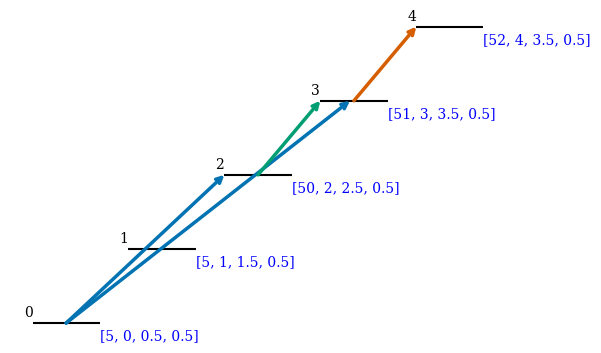

In [6]:
level_diagram = rq.draw_diagram(RbSensor_ss,include_dephasing=False)

### Initialize Sensor, add couplings

In [16]:
test_ss = rq.Sensor(basis_size=4)
test_ss.add_couplings({'states': (0,1), 'rabi_frequency': 5.0, 'detuning': 1.0, 'phase': 0.1})
test_ss.add_couplings({'states': (1,2), 'rabi_frequency': 10.0, 'detuning': 1.0, 'phase': 0.1})
test_ss.add_couplings({'states': (2,3), 'rabi_frequency': 15.0, 'detuning': 1.0, 'phase': 0.1})

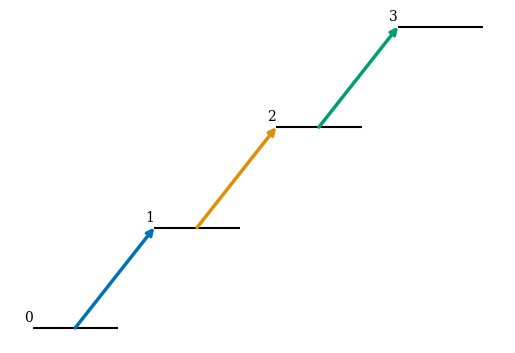

In [17]:
level_diagram = rq.draw_diagram(test_ss)

### Initialize Sensor, with couplings and dephasings

In [18]:
test_ss = rq.Sensor(basis_size=4)
test_ss.add_couplings({'states': (0,1), 'rabi_frequency': 5.0, 'detuning': 1.0, 'phase': 0.1})
test_ss.add_couplings({'states': (1,2), 'rabi_frequency': 10.0, 'detuning': 1.0, 'phase': 0.1})
test_ss.add_couplings({'states': (2,3), 'rabi_frequency': 15.0, 'detuning': 1.0, 'phase': 0.1})

gam = np.zeros((4,4))
gam[1,0] = 5.75
gam[2,1] = 3
gam[3,2] = 10e-3
#gam[:,0] += 50e-3
test_ss.set_gamma_matrix(2*np.pi*gam)

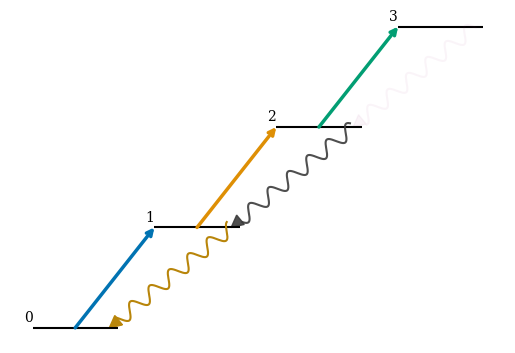

In [19]:
level_diagram = rq.draw_diagram(test_ss)

In [20]:
test_ss = rq.Sensor(basis_size=4)
test_ss.add_couplings({'states': (0,1), 'rabi_frequency': 5.0, 'detuning': 1.0, 'phase': 0.1})
test_ss.add_couplings({'states': (1,2), 'rabi_frequency': 10.0, 'detuning': 1.0, 'phase': 0.1})
test_ss.add_couplings({'states': (2,3), 'rabi_frequency': 15.0, 'detuning': 1.0, 'phase': 0.1})

gam = np.zeros((4,4))
gam[1,0] = 5.75
gam[2,1] = 3
gam[3,2] = 10e-3
gam[:,0] += 50e-3
test_ss.set_gamma_matrix(2*np.pi*gam)

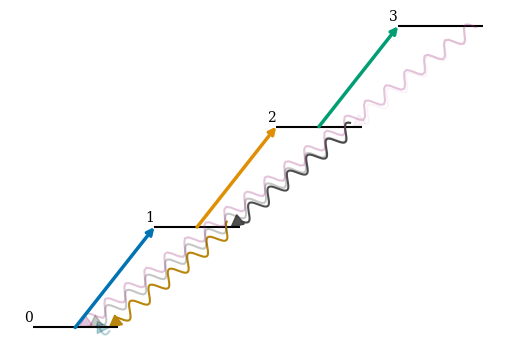

In [21]:
level_diagram = rq.draw_diagram(test_ss)